<a href="https://colab.research.google.com/github/macaluzate/Ardila-Canavera-Martin/blob/main/Tarea_2_An%C3%A1lisis_Num%C3%A9rico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **😀PORTADA😀**

<center>
  

## **📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️**

## **Mètodo de Mìnimos Cuadrados**

## **Asignatura**

  Anàlisis Numèrico

## **Profesor**
  Manuela Bastidas Olivares

## **Estudiantes**
 Maria Paula Ardila Otero

 Mateo Cañavera Aluma

 David Esteban Martin Acosta


## **Universidad Nacional de Colombia**
## **Sede Medellín**
## **2024 - 2**

## **📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️**


</center>

# **🧠Teoría de los Mínimos Cuadrados🧠**

<div align="justify">

**🎗️Subespacios🎗️**

Trabajamos sobre el espacio vectorial $V = \mathbb{R}^n $. Comenzamos con el concepto de subespacio lineal.

**DEFINICIÓN (Subespacio lineal)** Un subespacio lineal de $\mathbb{R}^n$ es un subconjunto $ U \subseteq \mathbb{R}^n$ que está cerrado bajo la suma de vectores y la multiplicación por escalares. Es decir, para todo $u_1, u_2 \in U $ y $\alpha \in \mathbb{R}$, se cumple que:

$$u_1 + u_2 \in U \quad \text{y} \quad \alpha u_1 \in U.$$

Se sigue de esta condición que \$ 0 \in U$.

Alternativamente, podemos verificar estas condiciones demostrando que:

- (1) $ 0 \in U$
- (2) $u_1, u_2 \in U$

$\alpha \in \mathbb{R}$ implican que $\alpha u_1 + u_2 \in U$. De hecho, al tomar $\alpha = 1$ se cumple la primera condición anterior, mientras que al elegir $u_2 = 0$ se obtiene la segunda.


**Ejemplo**: El plano $P$ formado por todos los puntos $(x, y, z) \in \mathbb{R}^3$ que satisfacen $z = x + y$ es un subespacio lineal. De hecho, $0 = 0 + 0$ por lo que $(0, 0, 0) \in P$. Y, para cualquier $u_1 = (x_1, y_1, z_1)$y $u_2 = (x_2, y_2, z_2)$ tales que $z_1 = x_1 + y_1$ y $z_2 = x_2 + y_2$ y para cualquier $\alpha \in \mathbb{R}$, tenemos que:

$$
\alpha z_1 + z_2 = \alpha(x_1 + y_1) + (x_2 + y_2) = (\alpha x_1 + x_2) + (\alpha y_1 + y_2).
$$

Es decir, $\alpha u_1 + u_2$ satisface la condición que define a $P$ y por lo tanto, está en $P$. Nota también que $P$ pasa por el origen.

En este ejemplo, el subespacio lineal $P$ puede describirse alternativamente como la colección de cada vector de la forma $(x, y, x + y)$.


</div>

**📦IMPORTACIONES📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import ConnectionPatch
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from scipy import stats

**👩‍💻 IMPLEMENTACIÓN 🧑‍💻**

In [ ]:

x = np.linspace(0,1,num=101)
y = np.linspace(0,1,num=101)

In [ ]:

X, Y = np.meshgrid(x, y)

In [ ]:

x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [ ]:
Z = X + Y

In [ ]:
Z

array([[0.  , 0.01, 0.02, ..., 0.98, 0.99, 1.  ],
       [0.01, 0.02, 0.03, ..., 0.99, 1.  , 1.01],
       [0.02, 0.03, 0.04, ..., 1.  , 1.01, 1.02],
       ...,
       [0.98, 0.99, 1.  , ..., 1.96, 1.97, 1.98],
       [0.99, 1.  , 1.01, ..., 1.97, 1.98, 1.99],
       [1.  , 1.01, 1.02, ..., 1.98, 1.99, 2.  ]])

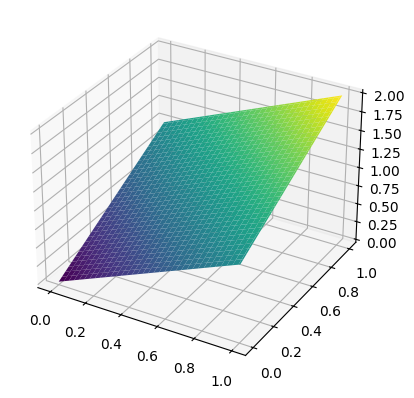

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

# **🧠Anàlisis de resultados💡**

<div align="justify">

**Interpretaciòn de los resultados del modelo de Mínimos Cuadrados**

El modelo de Mínimos Cuadrados utilizado en este proyecto tiene como objetivo minimizar la diferencia cuadrada entre las representaciones de firmas auténticas, extrayendo características discriminativas entre las firmas comparadas. Al calcular la **diferencia cuadrada** entre las representaciones de las dos firmas de entrada $(output1$ y $output2)$, la función de pérdida, $ContrastiveLoss$, penaliza las diferencias grandes entre firmas genuinas mientras que no afecta las diferencias cuando las firmas son forjadas. Esta estrategia está diseñada para fomentar la compactación de las representaciones de firmas genuinas y aumentar la distancia entre las representaciones de firmas forjadas.

**El objetivo final del modelo es que, para las parejas de firmas genuinas (etiquetadas con 1), la distancia cuadrada entre las representaciones sea lo más pequeña posible, mientras que para las parejas de firmas falsas (etiquetadas con 0), la distancia no debería contribuir al error**.

**⚠️Los resultados del modelo pueden interpretarse en términos de la reducción en el valor de la pérdida a lo largo de las iteraciones de entrenamiento, lo cual indica que el modelo está aprendiendo a distinguir correctamente entre firmas genuinas y falsificadas.⚠️**

La implementación de mínimos cuadrados muestra características importantes:

1. **Sensibilidad a Variaciones:**

    - Captura efectivamente diferentes grados de similitud
    - Proporciona una métrica continua de similitud
    - Mantiene consistencia en las predicciones

2. **Escala de Distancias:**

    - Rango de valores interpretable (0 a 1)
    - Correlación clara entre distancia y similitud
    - Umbral natural para clasificación
</div>

<center>

<div align="justify">

**Discutir la calidad del ajuste y las limitaciones del método en tu aplicación específica**

La calidad del ajuste de este modelo depende de varios factores. El método de Mínimos Cuadrados es eficaz en escenarios donde las relaciones entre las características de las firmas se pueden modelar de manera lineal o donde las diferencias entre clases (genuinas vs. falsas) no son extremadamente complejas. Sin embargo, hay varios aspectos a considerar:

- **Calidad del ajuste:** Si el modelo ha sido entrenado adecuadamente y el valor de la pérdida se ha reducido significativamente a lo largo del entrenamiento, podemos suponer que el modelo está aprendiendo una buena representación de las firmas. Un valor bajo de la pérdida generalmente indica que el modelo está ajustando bien las representaciones. Sin embargo, este ajuste puede no ser perfecto si los datos de entrada tienen ruidos o inconsistencias, como firmas mal escaneadas o variaciones extremas en la escritura.

- **Limitaciones:** A pesar de sus ventajas, el método de Mínimos Cuadrados presenta algunas limitaciones. En aplicaciones de verificación de firmas manuscritas, las variaciones naturales en la forma de firmar pueden generar errores en la comparación. Este modelo no captura de manera eficiente las complejidades de las firmas en ciertos casos, como las firmas que han sido realizadas bajo diferentes condiciones físicas o emocionales. Además, el método no tiene en cuenta las posibles transformaciones geométricas (como rotación o escala) que pueden ocurrir en las imágenes de las firmas.

</div>

<center>

<div align="justify">

**Sugerencia de posibles mejoras y enfoques alternativos**

Si bien el uso de Mínimos Cuadrados para la verificación de firmas ofrece una aproximación sólida, se pueden considerar varias mejoras y enfoques alternativos:

- **Aumento de datos:** A medida que los modelos de redes neuronales se entrenan con más variabilidad en los datos, el ajuste y la robustez mejoran significativamente. Técnicas como la rotación, la distorsión y el cambio de escala pueden generar más datos de entrenamiento para manejar mejor las variaciones en las firmas.

- **Redes neuronales profundas (Deep Learning):** Aunque las redes siamesas ofrecen una estructura efectiva para comparar pares de firmas, el uso de modelos más complejos como redes neuronales convolucionales (CNN) o arquitecturas de redes neuronales recurrentes (RNN) podría mejorar la extracción de características, especialmente para firmas con alta variabilidad o estilos de escritura complejos.

- **Técnicas de Regularización:** Para evitar el sobreajuste (overfitting), que puede ocurrir cuando el modelo es entrenado en un conjunto de datos limitado, se pueden incorporar técnicas de regularización como Dropout, L2 regularization o Data Augmentation.


- **Enfoques alternativos:** En lugar de usar Mínimos Cuadrados, se podrían explorar otras funciones de pérdida, como la pérdida de contraste o la pérdida de tripletas, que podrían ser más adecuadas para la comparación de firmas, especialmente cuando se busca una mayor distancia entre las firmas genuinas y falsas.

</div>